# Honour Code
I Victor, Nkadimeng, confirm - by submitting my - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

#### Import Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [32]:
train = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [53]:
train

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0              78150    46980       2490            3535        2584   
1              75821    31755       3219            2366        2584   
2              39888    60272       2713             996        2806   
3              48738     1797       3351             974        3733   
4              41364    48941       3219            2366        3733   
5              37653    39491         73            2701         318   
6              13662    13782       1187             801        1326   
7                486    48778       3219            2366        1326   
8              59274    90214       1433            3121        3354   
9              22881    81620       3399            3569          36   
10             59194     9215       1363            2091        1485   
11             45632    19723       3219            2366        1485   
12             91849     3580       3399            3569          36   
13              3525    64373       3399            3569          36   
14             85788    64373       3399            3569          36   
15             14237    64373       3399            3569          36   
16             17363    43437       1405            3032        1523   
17             94438    70717       1405            3032        1523   
18             68408    13269       3219            2366        1523   
19             14994    87083       1757            2758        1868   
20             91382    91087       3219            2366        1868   
21             90776     2669       1757            2758        1868   
22             28890    82298       3219            2366        1868   
23             80389    56388        669            2569         859   
24             20561    57432       1074            3111        1224   
25             76501      208       3219            2366        1224   
26             75976    18087        669            2569         859   
27             20262    64957        501            2844         709   
28             27560    56277       3219            2366         709   
29             87928    32276       2066            3586        2167   
...              ...      ...        ...             ...         ...   
95632          73425    41255       3262            2339        3650   
95633          70294    94029       1697             470        1806   
95634          60777    16313       1653            2624        1763   
95635          11454    39451       1321            1504        1447   
95636           9814     6379       3219            2366        1763   
95637          60317    27010       3219            2366        1447   
95638          35745    33965        201             639         436   
95639          75899    90971       2788             980        2877   
95640          23946    32181        192            2662         428   
95641          26208    85970       2788             980        2877   
95642          13592    61618       3219            2366        2877   
95643          10768    86886        274              87         501   
95644          57680    20296       2062            2795        2162   
95645          24212    71668        592            2137         792   
95646          21709    85839       3219            2366        2162   
95647          76708    41815       3219            2366         792   
95648          92727    38267        557            3494         761   
95649          29068     5365        932             308        3309   
95650          47483    80720        932             308        3309   
95651          32239    56783        932             308        3309   
95652          74505    70007       3332             684        3716   
95653          72105      670       3219            2366        3309   
95654          33813    35264       3332             684        3716   
95655          49436    88954       3219       

In [34]:
test_1 = test[['TransactionId']]

### Checking if the class in balanced

In [35]:
train['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

### Visualize the class

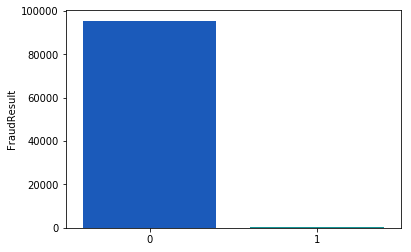

In [36]:
sns.barplot(train['FraudResult'].value_counts().index,train['FraudResult'].value_counts(),palette='winter')

### Resample the data

In [37]:
# from sklearn.utils import resample
# # Majority Variable
# train_maj = train[train['FraudResult'] == 0]
# # Minority variable 
# train_min = train[train['FraudResult'] == 1]

# train_maj_sampled = resample(train_maj , replace = False, n_samples = len(train_min), random_state = 123)

# train_concat = pd.concat([train_maj_sampled,train_min])

In [38]:
# train = train_concat

In [39]:
# sns.barplot(train_concat['FraudResult'].value_counts().index,train_concat['FraudResult'].value_counts(),palette='winter')

#### Checking Missing Values

In [40]:
train_missing_values = train.isnull().sum() / len(train) * 100
train_missing_values  = round(train_missing_values[train_missing_values > 0],2)
train_missing_values.sort_values(ascending = False, inplace = True)
pd.DataFrame(train_missing_values,columns = ['Missing'])

Empty DataFrame
Columns: [Missing]
Index: []

No missing values

#### Data Encoding (LabelEncoder)

In [41]:
from sklearn.preprocessing import LabelEncoder
# Train columns
cat = train.select_dtypes(include = object)
cat_col = list(cat)

# Test columns
num = test.select_dtypes(include = object)
num_col = list(num)

# Train Label Encooding
for col in cat_col:
    label = LabelEncoder()
    label.fit(list(train[col].values))
    train[col] = label.transform(list(train[col].values))

# Test Label Encoding
for col in num_col:
    label = LabelEncoder()
    label.fit(list(test[col].values))
    test[col] = label.transform(list(test[col].values))  


In [42]:
test.head()

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0          27503    21131        784            1941        1143   
1          43295    24825       1346             932        1756   
2          26351    35635       2179            1611        1143   
3          19533     3718        924            2055        1306   
4          17346    19131       2179            1611        1306   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0             0          256           4         19                0   
1             0          256           4          5                2   
2             0          256           3         22                2   
3             0          256           4          1                0   
4             0          256           3         22                2   

   ChannelId  Amount  Value  TransactionStartTime  PricingStrategy  
0          2  1000.0   1000                     0                4  
1          2  2000.0   2000                     1                2  
2          1   -50.0     50                     2                2  
3          2  3000.0   3000                     3                4  
4          1   -60.0     60                     4                2

In [57]:
# from scipy import stats
# from scipy.stats import norm, skew

In [43]:
# Separating a target variable
y = train['FraudResult']

# Predictors
X = train.drop(columns='FraudResult')

#### Split data

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


#### Fit the model

In [45]:
# Instatiating objects
lg = LogisticRegression()
rf = RandomForestClassifier()

# Fitting the data
lg.fit(X_train,y_train)
rf.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
y_pred_rf = rf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


####  Evaluating Model Performance

In [51]:
print('Logist :',accuracy_score(y_test,y_pred_lg))
print('Ramdom :',accuracy_score(y_test,y_pred_rf))

print('Rou : ', roc_auc_score(y_test,y_pred_lg))
print('Rou : ', roc_auc_score(y_test,y_pred_rf))

Logist : 0.9983797627136362
Ramdom : 0.9995296085297654
Rou :  0.6427000583456756
Rou :  0.9427262390975868


In [52]:
print('.......................CLASSIFICATION REPORT.....................')

print('Logistic Classifiction Report:', classification_report(y_test,y_pred_lg))
print('Random Forest Report:', classification_report(y_test,y_pred_rf))

.......................CLASSIFICATION REPORT.....................
Logistic Classifiction Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       0.62      0.29      0.39        35

   micro avg       1.00      1.00      1.00     19133
   macro avg       0.81      0.64      0.70     19133
weighted avg       1.00      1.00      1.00     19133

Random Forest Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19098
           1       0.86      0.89      0.87        35

   micro avg       1.00      1.00      1.00     19133
   macro avg       0.93      0.94      0.94     19133
weighted avg       1.00      1.00      1.00     19133



In [47]:
test.head()

TransactionId  BatchId  AccountId  SubscriptionId  CustomerId  \
0          27503    21131        784            1941        1143   
1          43295    24825       1346             932        1756   
2          26351    35635       2179            1611        1143   
3          19533     3718        924            2055        1306   
4          17346    19131       2179            1611        1306   

   CurrencyCode  CountryCode  ProviderId  ProductId  ProductCategory  \
0             0          256           4         19                0   
1             0          256           4          5                2   
2             0          256           3         22                2   
3             0          256           4          1                0   
4             0          256           3         22                2   

   ChannelId  Amount  Value  TransactionStartTime  PricingStrategy  
0          2  1000.0   1000                     0                4  
1          2  2000.0   2000                     1                2  
2          1   -50.0     50                     2                2  
3          2  3000.0   3000                     3                4  
4          1   -60.0     60                     4                2

#### Creating a Data Frame

In [48]:
df  = pd.DataFrame({'TransactionId': test_1['TransactionId'], 'FraudResult': rf.predict(test)})

#### Creating a csv

In [49]:
df.to_csv('out_csv1.csv',index = False)